In [1]:
from pygeo.segyread import SEGYFile
from pygeo.analysis import energyratio
import numpy as np
from dpcore import dp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 150 # Change this to adjust figure size

In [2]:
def normPosDiff(a, b):
    a = np.array(a)
    a.shape = (1, a.size)
    b = np.array(b)
    b.shape = (b.size, 1)
    
    diff = abs(a - b)
    
    return diff / diff.max()

In [3]:
infile = 'xhlayr.ppre.25D'
nsrc = 71
nrec = 71
src = 0
wlen = 10
pen = 1e-1

In [4]:
sf = SEGYFile(infile)
dims = (nsrc, nrec, sf.ns)
ns = sf.ns
trs = sf[:]
trse = energyratio(trs, wlen)

trs.shape = dims
trse.shape = dims

ltrs = trs[src,:]
ltrse = trse[src,:]

In [5]:
res = np.zeros(ltrs.shape, dtype=np.float32)
tr0e = ltrse[0]

for i in xrange(nrec):
    dif = normPosDiff(tr0e, ltrse[i])
    lc = np.array(dif, order='C', dtype=np.float)
    p, q, C, phi = dp(lc, penalty=pen)
    S = np.zeros((ns,ns))
    for j, k in zip(p,q):
        S[j,k] = 1

    res[i,:] = np.dot(S.T, ltrs[i])

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


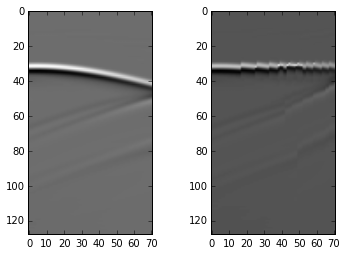

In [7]:
figure()
subplot(1,2,1)
imshow(ltrs.T, cmap=cm.gray)
subplot(1,2,2)
imshow(res.T, cmap=cm.gray)

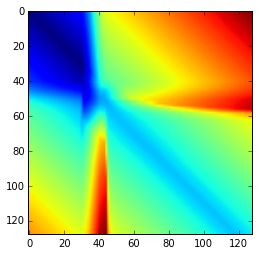

In [8]:
imshow(C)